In [2]:
import pandas as pd
import numpy as np

In [ ]:
# Working with missing data

In [ ]:
# Values considered “missing”
# pandas uses different sentinel values to represent a missing (also referred to as NA) depending on the data type.

# numpy.nan for NumPy data types. The disadvantage of using NumPy data types is that the original data type will be coerced to np.float64 or object.



In [5]:
pd.Series([1, 2], dtype=np.int64).reindex([0, 1, 2])

0    1.0
1    2.0
2    NaN
dtype: float64

In [6]:
pd.Series([True, False], dtype=np.bool_).reindex([0, 1, 2])

0     True
1    False
2      NaN
dtype: object

In [7]:
pd.Series([1, 2], dtype=np.dtype("timedelta64[ns]")).reindex([0, 1, 2])

0   0 days 00:00:00.000000001
1   0 days 00:00:00.000000002
2                         NaT
dtype: timedelta64[ns]

In [8]:
pd.Series(["2020", "2020"], dtype=pd.PeriodDtype("D")).reindex([0, 1, 2])

0    2020-01-01
1    2020-01-01
2           NaT
dtype: period[D]

In [ ]:
# NA for StringDtype, Int64Dtype (and other bit widths), Float64Dtype`(and other bit widths), :class:`BooleanDtype and ArrowDtype. These types will maintain the original data type of the data. For typing applications, use api.types.NAType.

In [9]:
pd.Series([1, 2], dtype="Int64").reindex([0, 1, 2])

0       1
1       2
2    <NA>
dtype: Int64

In [10]:
pd.Series([True, False], dtype="boolean[pyarrow]").reindex([0, 1, 2])

0     True
1    False
2     <NA>
dtype: bool[pyarrow]

In [ ]:
# To detect these missing value, use the isna() or notna() methods.

In [12]:
ser = pd.Series([pd.Timestamp("2020-01-01"), pd.NaT])
pd.isna(ser)

0    False
1     True
dtype: bool

In [ ]:
# isna() or notna() will also consider None a missing value.

In [14]:
ser = pd.Series([1, None], dtype=object)

ser

pd.isna(ser)


0    False
1     True
dtype: bool

In [15]:
# Equality compaisons between np.nan, NaT, and NA do not act like None

None == None
np.nan == np.nan

False

In [16]:
pd.NaT == pd.NaT

False

In [17]:
pd.NA == pd.NA

<NA>

In [19]:
# Therefore, an equality comparison between a DataFrame or Series with one of these missing values does not provide the same information as isna() or notna().

In [20]:
ser = pd.Series([True, None], dtype="boolean[pyarrow]")

ser == pd.NA

0    <NA>
1    <NA>
dtype: bool[pyarrow]

In [ ]:
# NA semantics

In [ ]:
# Starting from pandas 1.0, an experimental NA value (singleton) is available to represent scalar missing values. The goal of NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type).

# For example, when having missing values in a Series with the nullable integer dtype, it will use NA:

In [21]:
s = pd.Series([1, 2, None], dtype="Int64")

s

0       1
1       2
2    <NA>
dtype: Int64

In [22]:

s[2] is pd.NA

True

In [ ]:
# Currently, pandas does not yet use those data types using NA by default a DataFrame or Series, so you need to specify the dtype explicitly. An easy way to convert to those dtypes is explained in the conversion section.

In [ ]:
# Propagation in arithmetic and comparison operations

In [ ]:
# In general, missing values propagate in operations involving NA. When one of the operands is unknown, the outcome of the operation is also unknown.

# For example, NA propagates in arithmetic operations, similarly to np.nan:

In [23]:
pd.NA + 1
"a" * pd.NA


<NA>

In [ ]:
# There are a few special cases when the result is known, even when one of the operands is NA.

In [25]:
pd.NA ** 0
1 ** pd.NA

1

In [ ]:
# In equality and comparison operations, NA also propagates. This deviates from the behaviour of np.nan, where comparisons with np.nan always return False.

In [26]:
pd.NA == 1
pd.NA == pd.NA

<NA>

In [ ]:
# To check if a value is equal to NA, use isna()

In [27]:
pd.isna(pd.NA)

True

In [ ]:
# Logical operations
# For logical operations, NA follows the rules of the three-valued logic (or Kleene logic, similarly to R, SQL and Julia). This logic means to only propagate missing values when it is logically required.

# For example, for the logical “or” operation (|), if one of the operands is True, we already know the result will be True, regardless of the other value (so regardless the missing value would be True or False). In this case, NA does not propagate:

In [28]:
True | False

True

In [ ]:
# On the other hand, if one of the operands is False, the result depends on the value of the other operand. Therefore, in this case NA propagates:

In [29]:
False | True

True

In [30]:
False | pd.NA

<NA>

In [ ]:
# The behaviour of the logical “and” operation (&) can be derived using similar logic (where now NA will not propagate if one of the operands is already False):

In [31]:
False & True

False

In [32]:
False & pd.NA

False

In [33]:
True & pd.NA

<NA>

In [ ]:
# NA in a boolean context

In [ ]:
# Since the actual value of an NA is unknown, it is ambiguous to convert NA to a boolean value.

In [34]:
bool(pd.NA)

TypeError: boolean value of NA is ambiguous

In [ ]:
# This also means that NA cannot be used in a context where it is evaluated to a boolean, such as if condition: ... where condition can potentially be NA. In such cases, isna() can be used to check for NA or condition being NA can be avoided, for example by filling missing values beforehand.

# A similar situation occurs when using Series or DataFrame objects in if statements, see Using if/truth statements with pandas.

In [ ]:
# NumPy ufuncs

In [ ]:
# pandas.NA implements NumPy’s __array_ufunc__ protocol. Most ufuncs work with NA, and generally return NA:

In [35]:
np.log(pd.NA)

<NA>

In [36]:
np.add(pd.NA, 1)

<NA>

In [ ]:
# Conversion

In [ ]:
# Inserting missing data

In [ ]:
# You can insert missing values by simply assigning to a Series or DataFrame. The missing value sentinel used will be chosen based on the dtype.

In [38]:
ser = pd.Series([1., 2., 3.])

ser.loc[0] = None
ser

0    NaN
1    2.0
2    3.0
dtype: float64

In [40]:
ser = pd.Series([pd.Timestamp("2021"), pd.Timestamp("2021")])

ser.iloc[0] = np.nan
ser

0          NaT
1   2021-01-01
dtype: datetime64[ns]

In [42]:
ser = pd.Series([True, False], dtype="boolean[pyarrow]")

ser.iloc[0] = None
ser


0     <NA>
1    False
dtype: bool[pyarrow]

In [ ]:
# For object types, pandas will use the value given:

In [44]:
s = pd.Series(["a", "b", "c"], dtype=object)

s.loc[0] = None

s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

In [ ]:
# Calculations with missing data

In [ ]:
# Missing values propagate through arithmetic operations between pandas objects.

In [45]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])

ser2 = pd.Series([np.nan, 1, np.nan, 4])
ser1

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64

In [ ]:
# The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all account for missing data.

# When summing data, NA values or empty data will be treated as zero.

In [46]:
pd.Series([np.nan]).sum()


0.0

In [47]:
pd.Series([], dtype="float64").sum()

0.0

In [ ]:
# When taking the product, NA values or empty data will be treated as 1.

In [48]:
pd.Series([np.nan]).prod()

1.0

In [49]:
pd.Series([], dtype="float64").prod()

1.0

In [ ]:
# Cumulative methods like cumsum() and cumprod() ignore NA values by default preserve them in the result. This behavior can be changed with skipna

# Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [52]:
ser = pd.Series([1, np.nan, 3, np.nan])

ser
ser.cumsum(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

In [ ]:
# Dropping missing data

In [53]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]])

df


,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [54]:
df.dropna(axis=1)

,1
0,1
1,2
2,2


In [55]:
ser = pd.Series([1, pd.NA], dtype="int64[pyarrow]")

ser.dropna()

0    1
dtype: int64[pyarrow]

In [ ]:
# Filling missing data

In [ ]:
# Filling by value

In [ ]:
#     fillna() replaces NA values with non-NA data.

# Replace NA with a scalar value

In [56]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2], dtype="float64[pyarrow]")}

df = pd.DataFrame(data)
df.fillna(0)

,np,arrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0


In [ ]:
# Fill gaps forward or backward

In [58]:
df.ffill()
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


In [ ]:
# Limit the number of NA values filled

In [59]:
df.ffill(limit=1)


,np,arrow
0,1.0,1.0
1,1.0,1.0
2,NaN,<NA>
3,2.0,2.0


In [ ]:
# NA values can be replaced with corresponding value from a Series or DataFrame where the index and column aligns between the original object and the filled object.

In [60]:
dff = pd.DataFrame(np.arange(30, dtype=np.float64).reshape(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,NaN,14.0
5,15.0,NaN,NaN
6,18.0,19.0,NaN
7,21.0,22.0,NaN
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [61]:
dff.fillna(dff.mean())

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


In [ ]:
# DataFrame.where() can also be used to fill NA values.Same result as above.

In [62]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


In [ ]:
# Interpolation

In [ ]:
# DataFrame.interpolate() and Series.interpolate() fills NA values using various interpolation methods.

In [64]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)


df

df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [65]:
idx = pd.date_range("2020-01-01", periods=10, freq="D")

data = np.random.default_rng(2).integers(0, 10, 10).astype(np.float64)

ts = pd.Series(data, index=idx)
ts.iloc[[1, 2, 5, 6, 9]] = np.nan

ts

2020-01-01    8.0
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    2.0
2020-01-05    4.0
2020-01-06    NaN
2020-01-07    NaN
2020-01-08    0.0
2020-01-09    3.0
2020-01-10    NaN
Freq: D, dtype: float64

<Axes: >

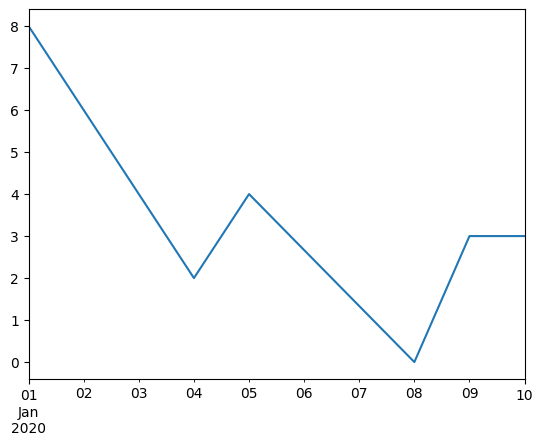

In [66]:
ts.interpolate().plot()

In [ ]:
# Interpolation relative to a Timestamp in the DatetimeIndex is available by setting method="time"

In [ ]:
ts2 = ts.iloc[[0, 1, 3, 7, 9]]

ts2

In [ ]:
# For a floating-point index, use method='values':

In [68]:
# idx = [0.0, 1.0, 10.0]

# ser = pd.Series([0.0, np.nan, 10.0], idx)

# ser
# ser.interpolate(method="values")

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

In [ ]:
If you have scipy installed, you can pass the name of a 1-d interpolation routine to method. as specified in the scipy interpolation documentation and reference guide. The appropriate interpolation method will depend on the data type.

In [ ]:
# If you are dealing with a time series that is growing at an increasing rate, use method='barycentric'.

# If you have values approximating a cumulative distribution function, use method='pchip'.

# To fill missing values with goal of smooth plotting use method='akima'.

In [3]:
df = pd.DataFrame(
   {
      "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
      "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
      
   }
)

In [4]:
df.interpolate(method="barycentric")

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [5]:

df.interpolate(method="akima")

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [ ]:
# When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [6]:
df.interpolate(method="spline", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [ ]:
# Interpolation limits

In [ ]:
# Comparing several methods.

<Axes: >

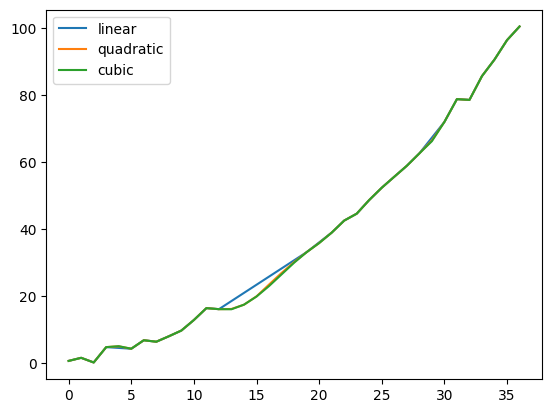

In [9]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser.iloc[missing] = np.nan

methods = ["linear", "quadratic", "cubic"]

df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

In [12]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))
interp_s = ser.reindex(new_index).interpolate(method="pchip")

interp_s.loc[49:51]

49.00    0.461739
49.25    0.462407
49.50    0.462862
49.75    0.463184
50.00    0.463449
50.25    0.463652
50.50    0.463789
50.75    0.463947
51.00    0.464212
dtype: float64

In [ ]:
interpolate() accepts a limit keyword argument to limit the number of consecutive NaN values filled since the last valid observation

In [70]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])

ser
ser.interpolate(limit=1)


0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

In [ ]:
# mBy default, NaN values are filled in a forward direction. Use limit_direction parameter to fill backward or from both directions.

In [71]:
ser.interpolate(limit=1, limit_direction="backward")

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [72]:
ser.interpolate(limit=2,limit_direction="backward")

0     5.0
1     5.0
2     5.0
3     NaN
4     9.0
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [73]:
ser.interpolate(limit=1, limit_direction="both")

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

In [ ]:
# By default, NaN values are filled whether they are surrounded by existing valid values or outside existing valid values. The limit_area parameter restricts filling to either inside or outside values.

In [74]:
ser.interpolate(limit_direction="both", limit_area="inside", limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [75]:
ser.interpolate(limit_direction="backward", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [76]:
ser.interpolate(limit_direction="both", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

In [ ]:
# Replacing values
# Series.replace() and DataFrame.replace() can be used similar to Series.fillna() and DataFrame.fillna() to replace or insert missing values.

In [77]:
df = pd.DataFrame(np.eye(3))

In [78]:
df_missing = df.replace(0, np.nan)

In [79]:
df_filled = df_missing.replace(np.nan, 2)

df_filled

,0,1,2
0,1.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,1.0


In [ ]:
# Replacing more than one value is possible by passing a list.

In [80]:
df_filled.replace([1, 44], [2, 28])

,0,1,2
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0


In [ ]:
# Replacing using a mapping dict.

In [81]:
df_filled.replace({1: 44, 2: 28})

,0,1,2
0,44.0,28.0,28.0
1,28.0,44.0,28.0
2,28.0,28.0,44.0


In [ ]:
# Regular expression replacement

In [ ]:
# Python strings prefixed with the r character such as r'hello world' are “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'.

In [ ]:
## Replace with Nan

In [82]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}

df = pd.DataFrame(d)

df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [ ]:
# Replace the ‘.’ with NaN with regular expression that removes surrounding whitespace

In [83]:
df.replace(r"\s*\.\s*", np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [84]:
df.replace([r"\.", r"(a)"], ["dot", r"\1stuff"], regex=True)

,a,b,c
0,0,astuff,astuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


In [85]:
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [ ]:
# Pass nested dictionaries of regular expressions that use the regex keyword.

In [86]:
df.replace({"b": {"b": r""}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [87]:
df.replace({"b": r"\s*(\.)\s*"}, {"b": r"\1ty"}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


In [88]:
# df.replace({"b": r"\s*(\.)\s*"}, {"b": r"\1ty"}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


In [ ]:
All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary.

In [89]:
# df.replace(regex=[r"\s*\.\s*", r"a|b"], value="placeholder")

,a,b,c
0,0,placeholder,placeholder
1,1,placeholder,placeholder
2,2,placeholder,NaN
3,3,placeholder,d


In [91]:
# A regular expression object from re.compile is a valid input as well.